In [1]:
# from google.colab import drive
# drive.mount( '/content/drive/' )

In [14]:
import time
import io
import matplotlib.pyplot as plt
import numpy as np
import math 
import pandas as pd
import pickle
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

from matplotlib.colors import Normalize

In [15]:
path_to_dataset = 'output/'
df = pd.read_csv( path_to_dataset + "2020_05_01_02_50_12_AM_metrics" )
df = df.T

# The transpose of the dataframe is taken. And the header of the first row is used as the new headers of the dataframe

new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [16]:
def make_float( string ):
    try:
        digits = float (''.join(ch for ch in string.split(",")[1] if ch.isdigit() or ch == '.'))
        return digits
    except:
        return np.nan

In [21]:
# Make the Y vector
# Change the df field note according changes might be needed in the make_float function

Y = df["microservices_demo_user_request_latency_microseconds"] 
Y = np.array( Y )[ : , 2  ] # 2 because the second column has the 99 percentile latency
Y_float = [ make_float(y) for y in Y[ :  ] ]

Y_float = pd.Series( Y_float )
Y_float = Y_float.dropna()
Y_float = Y_float.iloc[:-1]

In [51]:
# Make X
list_of_features = [ "gc_g1_old_generation_count" , "gc_g1_young_generation_count" , "go_gc_duration_seconds" ,
                    "go_memstats_heap_alloc_bytes" , "go_memstats_heap_inuse_bytes",
                   "go_memstats_last_gc_time_seconds" , "go_memstats_mallocs_total" , "go_memstats_stack_inuse_bytes" , "heap_used" , "httpsessions_active" , 
                   "jvm_classes_loaded" , "jvm_gc_collection_seconds_count" , "jvm_memory_bytes_committed" ,
                   "jvm_memory_bytes_max" , "jvm_memory_bytes_used" , "jvm_memory_pool_bytes_committed" , 
                   "jvm_memory_pool_bytes_max" , "jvm_memory_pool_bytes_used" , "microservices_demo_user_request_count",
                   "nodejs_heap_size_used_bytes"]

final_list_of_features = []
X = pd.DataFrame()
for feature in list_of_features:
    df2 = df[ feature ]
    feature_array = np.array(df2)
#     print(feature)
    if len(df2.shape) == 2:
        for i in range( df2.shape[1] ):
            x_feature = feature_array[ : , i ]
            x_feature_float = [ make_float(x) for x in x_feature[ : ] ]
            X[ feature + str( i ) ] = x_feature_float
            final_list_of_features.append( feature + str( i ) )
    else:
        x_feature = feature_array
        x_feature_float = [ make_float(x) for x in x_feature[ : ] ]
        X[ feature + str( i ) ] = x_feature_float
        final_list_of_features.append( feature + str( i ) )
        
X.dtypes
X.astype(float)
# X.astype(object).convert_objects()
# X.to_csv('out.csv')
X = X.dropna()
# imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp.fit_transform(X)
X

,gc_g1_old_generation_count0,gc_g1_old_generation_count1,gc_g1_old_generation_count2,gc_g1_young_generation_count0,gc_g1_young_generation_count1,gc_g1_young_generation_count2,go_gc_duration_seconds0,go_gc_duration_seconds1,go_gc_duration_seconds2,go_gc_duration_seconds3,...,jvm_memory_pool_bytes_used13,jvm_memory_pool_bytes_used14,jvm_memory_pool_bytes_used15,jvm_memory_pool_bytes_used16,jvm_memory_pool_bytes_used17,microservices_demo_user_request_count0,microservices_demo_user_request_count1,microservices_demo_user_request_count2,microservices_demo_user_request_count3,nodejs_heap_size_used_bytes3
0,0.0,0.0,0.0,94.0,207.0,212.0,0.000047,0.000215,0.000257,0.000417,...,49720328.0,5706576.0,47185920.0,1048576.0,53779904.0,7833.0,7833.0,31332.0,8139.0,25243648.0
1,0.0,0.0,0.0,94.0,207.0,213.0,0.000047,0.000215,0.000257,0.000417,...,49720328.0,5706576.0,1048576.0,1048576.0,53429920.0,7845.0,7845.0,31380.0,8152.0,25243648.0
2,0.0,0.0,0.0,94.0,208.0,213.0,0.000047,0.000215,0.000257,0.000417,...,49720328.0,5706576.0,35651584.0,1048576.0,53429920.0,7878.0,7878.0,31512.0,8186.0,26207080.0
3,0.0,0.0,0.0,94.0,208.0,213.0,0.000047,0.000215,0.000257,0.000417,...,49720328.0,5706576.0,59768832.0,1048576.0,53429920.0,7899.0,7899.0,31596.0,8211.0,26207080.0
4,0.0,0.0,0.0,94.0,208.0,214.0,0.000047,0.000215,0.000257,0.000417,...,49720328.0,5706576.0,19922944.0,1048576.0,53559352.0,7920.0,7920.0,31680.0,8236.0,24550560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.0,0.0,0.0,109.0,327.0,335.0,0.000047,0.000225,0.000263,0.000408,...,49722360.0,5706576.0,58720256.0,1048576.0,54079128.0,14937.0,14937.0,59751.0,15525.0,49246360.0
123,0.0,0.0,0.0,109.0,328.0,337.0,0.000047,0.000225,0.000263,0.000408,...,49722360.0,5706576.0,38797312.0,1048576.0,54111128.0,15036.0,15036.0,60144.0,15625.0,49246360.0
124,0.0,0.0,0.0,109.0,331.0,339.0,0.000047,0.000225,0.000263,0.000408,...,49722360.0,5706576.0,39845888.0,1048576.0,54082480.0,15168.0,15168.0,60672.0,15760.0,41167736.0
125,0.0,0.0,0.0,110.0,333.0,342.0,0.000047,0.000225,0.000263,0.000408,...,49722360.0,5706576.0,15728640.0,1048576.0,54156112.0,15320.0,15320.0,61280.0,15916.0,41167736.0


In [52]:
X_train, X_test, y_train, y_test = train_test_split( X, Y_float , test_size=0.33, random_state=42)

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform( X_test )

# DO NOT USE FOR 5710 BELOW THIS LINE

In [54]:
y_train = y_train - np.mean(y_train) > 0
y_train = np.array( y_train , dtype = np.int )
y_test = y_test - np.mean(y_test) > 0
y_test = np.array( y_test , dtype = np.int )

In [55]:
clf = LogisticRegression(C=1,
                         multi_class='multinomial',
                         penalty='l2', solver='saga', tol=0.1)
# Train the classifier
clf.fit(X_train, y_train)
score = clf.score(X_train, y_train)
print("Test score with L1 penalty: %.4f" % score)
#Evaluate the classifier
# score = clf.score(X_val ,  y_val)
print("Test score with L1 penalty: %.4f" % score)

Test score with L1 penalty: 1.0000
Test score with L1 penalty: 1.0000


In [56]:
clf = SVC(kernel = 'rbf' , C = 100 , gamma = 100)
# Train the classifier
clf.fit(X_train, y_train.flatten())
score = clf.score(X_train , y_train)
print("Test score with L1 penalty: %.4f" % score)
# score = clf.score(x_val, y_val.flatten())
print("Test score with L1 penalty: %.4f" % score)

Test score with L1 penalty: 1.0000
Test score with L1 penalty: 1.0000


In [57]:
score = clf.score(X_test, y_test.flatten())
print("Test score with L1 penalty: %.4f" % score)

Test score with L1 penalty: 0.5952


In [0]:
# C_range = np.logspace(-2, -3, 2)
# gamma_range = np.logspace(-7, -8, 2)
# param_grid = dict(gamma=gamma_range, C=C_range)
# cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
# grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
# grid.fit(x_train , y_train)

# print("The best parameters are %s with a score of %0.2f"
#       % (grid.best_params_, grid.best_score_))

In [67]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

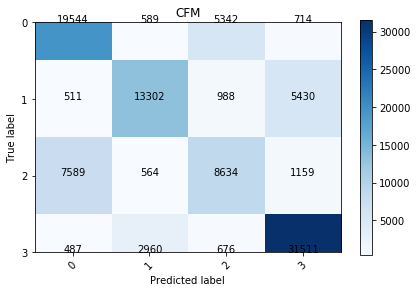

In [69]:
y_predict = clf.predict(x_test)
cfm = confusion_matrix(y_test.flatten(), y_predict)
plot_confusion_matrix(cfm, classes=range(4), 
                      title='CFM')

In [58]:
def cross_validation(xTr,yTr,xValid,yValid,ktype,CList,lmbdaList):
    ErrorMatrix=np.zeros((len(CList),len(lmbdaList)))
    bestC,bestLmbda = 0.,0.
    
    # Start Solution
    hype_para = []
    trainingerr = []
    testingerr = []
    for C in CList:
        for lmbda in lmbdaList:
            hype_para.append((C,lmbda))

    for C, lmbda in hype_para:
        clf = SVC(kernel = ktype , C = C , gamma = lmbda)
        # Train the classifier
        clf.fit(x_train, y_train)
        score_tr = clf.score(x_train , y_train)
        print("Train score: %.4f for C %4f and lmbda %4f" % (score_tr , C , lmbda))
        score_te = clf.score(x_val, y_val)
        print("Test score: %.4f for C %4f and lmbda %4f" % (score_te , C , lmbda))

        trainerror_single = 1 - score_tr
        trainingerr.append(trainerror_single)
        testerror_single = 1 - score_te
        testingerr.append(testerror_single)
        if testerror_single == np.amin(testingerr):
             bestC,bestLmbda = C, lmbda
        print("Training error: %2.4f" % trainerror_single)
        print("Testing error: %2.4f" % testerror_single)

    ErrorMatrix = np.reshape(testingerr,(len(CList),len(lmbdaList)))    
    # End Solution
            
    return bestC,bestLmbda,ErrorMatrix

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.6895 for C 0.500000 and lmbda 0.100000
Test score: 0.6838 for C 0.500000 and lmbda 0.100000
Training error: 0.3105
Testing error: 0.3162


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.6992 for C 0.500000 and lmbda 0.200000
Test score: 0.6944 for C 0.500000 and lmbda 0.200000
Training error: 0.3008
Testing error: 0.3056


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7059 for C 0.500000 and lmbda 0.300000
Test score: 0.6972 for C 0.500000 and lmbda 0.300000
Training error: 0.2941
Testing error: 0.3028


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7107 for C 0.500000 and lmbda 0.400000
Test score: 0.6990 for C 0.500000 and lmbda 0.400000
Training error: 0.2893
Testing error: 0.3010


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7159 for C 0.500000 and lmbda 0.500000
Test score: 0.6996 for C 0.500000 and lmbda 0.500000
Training error: 0.2841
Testing error: 0.3004


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.6929 for C 1.000000 and lmbda 0.100000
Test score: 0.6878 for C 1.000000 and lmbda 0.100000
Training error: 0.3071
Testing error: 0.3122


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7048 for C 1.000000 and lmbda 0.200000
Test score: 0.6992 for C 1.000000 and lmbda 0.200000
Training error: 0.2952
Testing error: 0.3008


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7128 for C 1.000000 and lmbda 0.300000
Test score: 0.7004 for C 1.000000 and lmbda 0.300000
Training error: 0.2872
Testing error: 0.2996


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7205 for C 1.000000 and lmbda 0.400000
Test score: 0.7030 for C 1.000000 and lmbda 0.400000
Training error: 0.2795
Testing error: 0.2970


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7267 for C 1.000000 and lmbda 0.500000
Test score: 0.7032 for C 1.000000 and lmbda 0.500000
Training error: 0.2733
Testing error: 0.2968


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.6976 for C 2.000000 and lmbda 0.100000
Test score: 0.6920 for C 2.000000 and lmbda 0.100000
Training error: 0.3024
Testing error: 0.3080


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7103 for C 2.000000 and lmbda 0.200000
Test score: 0.6992 for C 2.000000 and lmbda 0.200000
Training error: 0.2897
Testing error: 0.3008


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7215 for C 2.000000 and lmbda 0.300000
Test score: 0.7036 for C 2.000000 and lmbda 0.300000
Training error: 0.2785
Testing error: 0.2964


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7292 for C 2.000000 and lmbda 0.400000
Test score: 0.7012 for C 2.000000 and lmbda 0.400000
Training error: 0.2708
Testing error: 0.2988


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7375 for C 2.000000 and lmbda 0.500000
Test score: 0.7002 for C 2.000000 and lmbda 0.500000
Training error: 0.2625
Testing error: 0.2998


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7013 for C 4.000000 and lmbda 0.100000
Test score: 0.6952 for C 4.000000 and lmbda 0.100000
Training error: 0.2987
Testing error: 0.3048


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7170 for C 4.000000 and lmbda 0.200000
Test score: 0.7014 for C 4.000000 and lmbda 0.200000
Training error: 0.2830
Testing error: 0.2986


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7285 for C 4.000000 and lmbda 0.300000
Test score: 0.7002 for C 4.000000 and lmbda 0.300000
Training error: 0.2715
Testing error: 0.2998


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7386 for C 4.000000 and lmbda 0.400000
Test score: 0.7008 for C 4.000000 and lmbda 0.400000
Training error: 0.2614
Testing error: 0.2992


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7487 for C 4.000000 and lmbda 0.500000
Test score: 0.6962 for C 4.000000 and lmbda 0.500000
Training error: 0.2513
Testing error: 0.3038


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7071 for C 8.000000 and lmbda 0.100000
Test score: 0.6978 for C 8.000000 and lmbda 0.100000
Training error: 0.2929
Testing error: 0.3022


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7233 for C 8.000000 and lmbda 0.200000
Test score: 0.6998 for C 8.000000 and lmbda 0.200000
Training error: 0.2767
Testing error: 0.3002


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7367 for C 8.000000 and lmbda 0.300000
Test score: 0.7016 for C 8.000000 and lmbda 0.300000
Training error: 0.2633
Testing error: 0.2984


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7488 for C 8.000000 and lmbda 0.400000
Test score: 0.6970 for C 8.000000 and lmbda 0.400000
Training error: 0.2512
Testing error: 0.3030


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7601 for C 8.000000 and lmbda 0.500000
Test score: 0.6950 for C 8.000000 and lmbda 0.500000
Training error: 0.2399
Testing error: 0.3050


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7115 for C 16.000000 and lmbda 0.100000
Test score: 0.6994 for C 16.000000 and lmbda 0.100000
Training error: 0.2885
Testing error: 0.3006


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7296 for C 16.000000 and lmbda 0.200000
Test score: 0.6982 for C 16.000000 and lmbda 0.200000
Training error: 0.2704
Testing error: 0.3018


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7442 for C 16.000000 and lmbda 0.300000
Test score: 0.6976 for C 16.000000 and lmbda 0.300000
Training error: 0.2558
Testing error: 0.3024


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7601 for C 16.000000 and lmbda 0.400000
Test score: 0.6960 for C 16.000000 and lmbda 0.400000
Training error: 0.2399
Testing error: 0.3040


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7731 for C 16.000000 and lmbda 0.500000
Test score: 0.6904 for C 16.000000 and lmbda 0.500000
Training error: 0.2269
Testing error: 0.3096


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7169 for C 32.000000 and lmbda 0.100000
Test score: 0.7020 for C 32.000000 and lmbda 0.100000
Training error: 0.2831
Testing error: 0.2980


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7361 for C 32.000000 and lmbda 0.200000
Test score: 0.6986 for C 32.000000 and lmbda 0.200000
Training error: 0.2639
Testing error: 0.3014


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7536 for C 32.000000 and lmbda 0.300000
Test score: 0.6934 for C 32.000000 and lmbda 0.300000
Training error: 0.2464
Testing error: 0.3066


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7717 for C 32.000000 and lmbda 0.400000
Test score: 0.6890 for C 32.000000 and lmbda 0.400000
Training error: 0.2283
Testing error: 0.3110


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.7870 for C 32.000000 and lmbda 0.500000
Test score: 0.6806 for C 32.000000 and lmbda 0.500000
Training error: 0.2130
Testing error: 0.3194


Text(0.5, 1.0, 'Validation error')

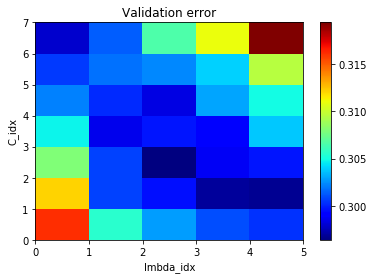

In [0]:
CList=(10.0**np.linspace(-1,5,7))
lmbdaList=(np.linspace(0.1,0.5,5))

bestC,bestLmbda,ErrorMatrix = cross_validation(x_train,y_train,x_val,y_val,'rbf',CList,lmbdaList)

plt.pcolormesh(ErrorMatrix, cmap='jet')
plt.colorbar()
plt.xlabel("lmbda_idx")
plt.ylabel("C_idx")
plt.title("Validation error")

Feature ranking:
1. jvm_memory_pool_bytes_used6 (0.065733)
2. jvm_memory_bytes_used5 (0.048745)
3. jvm_memory_pool_bytes_used12 (0.048405)
4. jvm_memory_pool_bytes_used13 (0.047861)
5. gc_g1_young_generation_count0 (0.047612)
6. microservices_demo_user_request_count3 (0.046147)
7. jvm_memory_bytes_used3 (0.044039)
8. jvm_memory_pool_bytes_used7 (0.043490)
9. jvm_gc_collection_seconds_count4 (0.043133)
10. microservices_demo_user_request_count1 (0.042732)
11. microservices_demo_user_request_count2 (0.039642)
12. jvm_gc_collection_seconds_count2 (0.033856)
13. go_memstats_mallocs_total0 (0.033351)
14. go_memstats_last_gc_time_seconds0 (0.032588)
15. go_memstats_mallocs_total1 (0.030551)
16. gc_g1_young_generation_count2 (0.029241)
17. jvm_gc_collection_seconds_count0 (0.028257)
18. go_memstats_last_gc_time_seconds1 (0.024593)
19. go_memstats_mallocs_total2 (0.024464)
20. gc_g1_young_generation_count1 (0.024431)
21. microservices_demo_user_request_count0 (0.021469)
22. jvm_memory_pool_byt

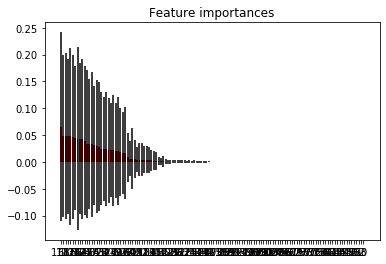

In [61]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=127,
                           n_features=128,
                           n_informative=4,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train , y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, final_list_of_features[indices[f]] , importances[indices[f]] ))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
# plt.xlim([-1, X.shape[1]])
plt.show()

In [0]:
# EVI, NDVI , ARVI, Mean_R , Mean_G, Mean_B , Mean_H , Mean_S, Mean_V , Mean_NIR , Std_NIR
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(X.shape[1]), importances[indices],
#        color="r", yerr=std[indices], align="center")
# plt.xticks(range(X.shape[1]), [ "Std_NIR" , "Mean_NIR"  ,  "ARVI"  , "Mean_R" ,  "NDVI" ,  "EVI" , "Mean_S" ,  "Mean_V" , "Mean_H" ,    "Mean_G" , "Mean_B" ] , rotation='vertical')
# plt.xlim([-1, X.shape[1]])
# plt.show()

In [95]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(x_train , y_train.flatten())
score = clf.score(x_train , y_train)
print("Train score: %.4f" % score)

Train score: 0.6849


KeyboardInterrupt: 

In [300]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier( hidden_layer_sizes = (500,50) ,activation = 'relu', validation_fraction = 0.1,
                    solver = 'adam' , verbose = True , random_state = 1 )

clf.fit( X_train , y_train )
score = clf.score(x_train , y_train)
print("Test score: %.4f" % score)



ValueError: Unknown label type: (array([0.02229198, 0.01611119]),)

In [55]:
score = clf.score(x_test , y_test)
print("Test score: %.4f" % score)

Test score: 0.7299
